In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/train.csv')

Intial exploration of data

In [ ]:
print(data.shape)
print(data.columns.tolist())
print(data.dtypes)

(891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see that the problem to solve here is to predict the survived column

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Feature deletion

FInding columns which has unique values for each observation

In [ ]:
columnname = data.columns.to_list()
observation_length = data.shape[0]
dummies = []
for x in columnname:
  if len(data[x].unique()) == observation_length:
    dummies.append(x)
print(dummies)

['PassengerId', 'Name']


As they do not provide any useful info. We are gonna delete them

In [ ]:
data1 = data.copy()
data1.drop(dummies, axis = 1, inplace = True)
data1.shape

(891, 10)

In [ ]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


the ticket columns looks a little suspicious

In [ ]:
data1['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

it has a huge number of unique values lets check them to see any order or categories

In [ ]:
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

Ticket columns doesnt seem to have any ordering or category, As this also doesnt give any useful info. We shall delete it also

In [ ]:
data2 = data1.copy()
data2.drop(['Ticket'], axis = 1, inplace = True)
data2.shape

(891, 9)

# Exploratory data analysis and cleaning

## Numerical columns Analysis

In [ ]:
numerical_cols = data2.select_dtypes('number').columns.tolist()
print(numerical_cols)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
data2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Survived Column

In [ ]:
data2['Survived'].isnull().sum()

0

In [ ]:
data2['Survived'].unique()

array([0, 1])

col_0,count
Survived,
0,0.616162
1,0.383838


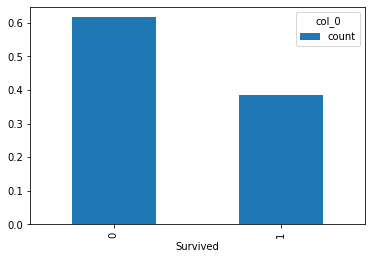

In [ ]:
ct = pd.crosstab(index = data2['Survived'], columns = 'count')
ct = ct/data2.shape[0]
display(ct)
ct.plot(kind = 'bar')

We can see that around 61 % people died and around 38% people survived

### Pclass column

In [ ]:
data2['Pclass'].isnull().sum()

0

In [ ]:
data2['Pclass'].unique()

array([3, 1, 2])

col_0      count
Pclass          
1       0.242424
2       0.206510
3       0.551066


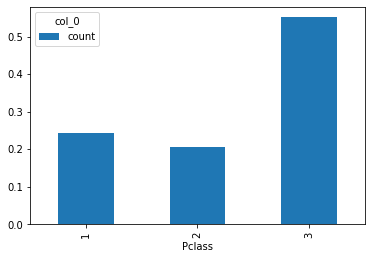

In [ ]:
ct = pd.crosstab(index = data2['Pclass'], columns = 'count')
ct = ct/data2.shape[0]
print(ct)
ct.plot(kind = 'bar')

We can see that majority were of class 3

We can see there are 3 unique values for passenger class but these can be converted into categorical feature instead as they refer to a passenger class and also they also have an order to them 

In [ ]:
Pclass = pd.Categorical(data2["Pclass"],
                           ordered=True)
Pclass.describe()

,counts,freqs
categories,,
1,216,0.242424
2,184,0.206510
3,491,0.551066


In [ ]:
data3 = data2.copy()
data3['Pclass'] = Pclass
data3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
# Do the one hot encoding
data3 = pd.get_dummies(data3, columns=['Pclass'])
data3.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,female,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,female,35.0,1,0,53.1000,C123,S,1,0,0
4,0,male,35.0,0,0,8.0500,NaN,S,0,0,1


Lets see the survived ratio among the passenger classes

Pclass,1,2,3,All
Survived,,,,
0,0.089787,0.108866,0.417508,0.616162
1,0.152637,0.097643,0.133558,0.383838
All,0.242424,0.206510,0.551066,1.000000


Pclass          1         2         3       All
Survived                                       
0         0.37037  0.527174  0.757637  0.616162
1         0.62963  0.472826  0.242363  0.383838
All       1.00000  1.000000  1.000000  1.000000
Pclass           1         2         3  All
Survived                                   
0         0.145719  0.176685  0.677596  1.0
1         0.397661  0.254386  0.347953  1.0
All       0.242424  0.206510  0.551066  1.0


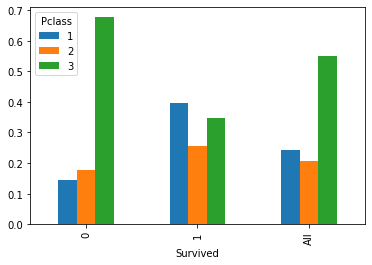

In [ ]:
survived_pclass = pd.crosstab(index=data2["Survived"], 
                           columns=data2["Pclass"], margins = True)
display(survived_pclass/survived_pclass.loc["All","All"])
print(survived_pclass/survived_pclass.loc["All"])
survived_pclass = survived_pclass.div(survived_pclass["All"],
                   axis=0)
print(survived_pclass)

survived_pclass.pop('All')
survived_pclass.plot(kind = 'bar')

We can class 3 people have have died a lot when compared to other classes and class 1 people have survived the most when compared to other classes

### Age column

In [ ]:
data3['Age'].isnull().sum()

177

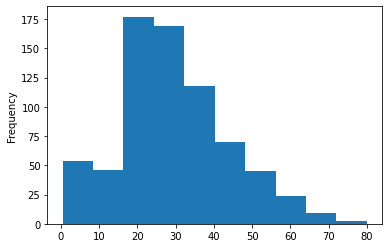

In [ ]:
data3['Age'].plot(kind = 'hist')

as age follows a normal distribution we can switch out the nan values with mean

In [ ]:
mean = np.nanmean(data3['Age'])
mean

29.69911764705882

In [ ]:
data3['Age'].fillna(mean, inplace = True)

In [ ]:
data3['Age'].isnull().sum()

0

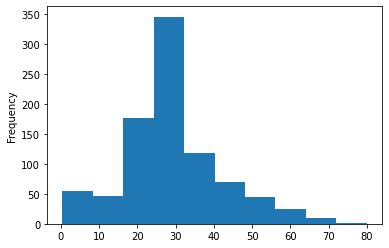

In [ ]:
data3['Age'].plot(kind = 'hist')

In [ ]:
data3.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,female,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,female,35.0,1,0,53.1000,C123,S,1,0,0
4,0,male,35.0,0,0,8.0500,NaN,S,0,0,1


Using the original data lets what age range survived the most

In [ ]:
dummydata = data2.dropna(subset = ["Age"])
dummydata

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,NaN,Q
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
889,1,1,male,26.0,0,0,30.0000,C148,C


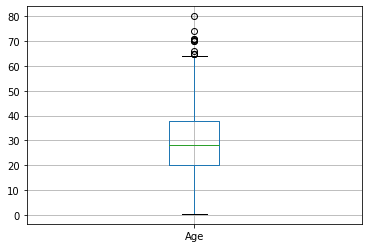

In [ ]:
dummydata.boxplot(column = 'Age')

In [ ]:
bins = [0,20,40,60,80,100,120]
labels = ['0-20','20-40','40-60','60-80','80-100','100+']

dummydata['Age_range'] = pd.cut(dummydata['Age'],bins = bins, labels = labels)
dummydata.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_range
0,0,3,male,22.0,1,0,7.2500,NaN,S,20-40
1,1,1,female,38.0,1,0,71.2833,C85,C,20-40
2,1,3,female,26.0,0,0,7.9250,NaN,S,20-40
3,1,1,female,35.0,1,0,53.1000,C123,S,20-40
4,0,3,male,35.0,0,0,8.0500,NaN,S,20-40


In [ ]:
dummydata['Age_range'].unique()

['20-40', '40-60', '0-20', '60-80']
Categories (6, object): ['0-20' < '20-40' < '40-60' < '60-80' < '80-100' < '100+']

Age_range,0-20,20-40,40-60,60-80,All
Survived,,,,,
0,0.135854,0.324930,0.109244,0.023810,0.593838
1,0.114846,0.214286,0.070028,0.007003,0.406162
All,0.250700,0.539216,0.179272,0.030812,1.000000


Age_range,0-20,20-40,40-60,60-80,All
Survived,,,,,
0,0.541899,0.602597,0.609375,0.772727,0.593838
1,0.458101,0.397403,0.390625,0.227273,0.406162
All,1.000000,1.000000,1.000000,1.000000,1.000000


Age_range,0-20,20-40,40-60,60-80,All
Survived,,,,,
0,0.228774,0.547170,0.183962,0.040094,1.0
1,0.282759,0.527586,0.172414,0.017241,1.0
All,0.250700,0.539216,0.179272,0.030812,1.0


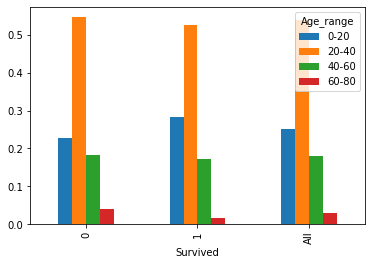

In [ ]:
survived_age = pd.crosstab(index=dummydata["Survived"], 
                           columns=dummydata["Age_range"], margins = True)
display(survived_age/survived_age.loc["All","All"])
display(survived_age/survived_age.loc["All"])
survived_age = survived_age.div(survived_age["All"],
                   axis=0)
display(survived_age)

survived_age.pop('All')
survived_age.plot(kind = 'bar')

### Sibsp and parch column

In [ ]:
data3['SibSp'].isnull().sum()

0

In [ ]:
data3['Parch'].isnull().sum()

0

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


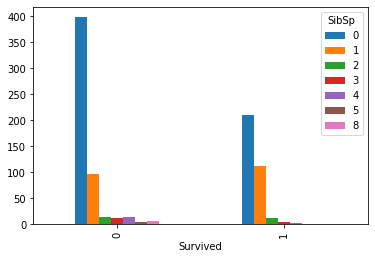

In [ ]:
survived_SibSp = pd.crosstab(index=data3["Survived"], 
                           columns=data3["SibSp"])
display(survived_SibSp)
survived_SibSp.plot(kind = 'bar')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


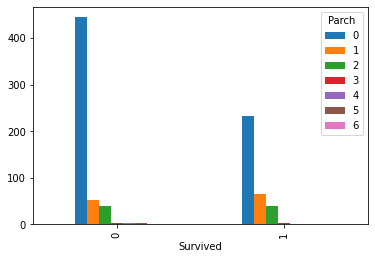

In [ ]:
survived_parch = pd.crosstab(index=data3["Survived"], 
                           columns=data3["Parch"])
display(survived_parch)
survived_parch.plot(kind = 'bar')

In [ ]:
def with_family(row):
  if (row['SibSp'] !=0) or (row['Parch'] != 0):
    return 1
  else:
    return 0

In [ ]:
data4 = data3.copy()
data4['with_family'] = data3.apply(lambda row : with_family(row), axis = 1)
data4.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,with_family
0,0,male,22.0,1,0,7.2500,NaN,S,0,0,1,1
1,1,female,38.0,1,0,71.2833,C85,C,1,0,0,1
2,1,female,26.0,0,0,7.9250,NaN,S,0,0,1,0
3,1,female,35.0,1,0,53.1000,C123,S,1,0,0,1
4,0,male,35.0,0,0,8.0500,NaN,S,0,0,1,0


with_family,0,1,All
Survived,,,
0,0.419753,0.196409,0.616162
1,0.182941,0.200898,0.383838
All,0.602694,0.397306,1.000000


with_family,0,1,All
Survived,,,
0,0.696462,0.49435,0.616162
1,0.303538,0.50565,0.383838
All,1.000000,1.00000,1.000000


with_family,0,1,All
Survived,,,
0,0.681239,0.318761,1.0
1,0.476608,0.523392,1.0
All,0.602694,0.397306,1.0


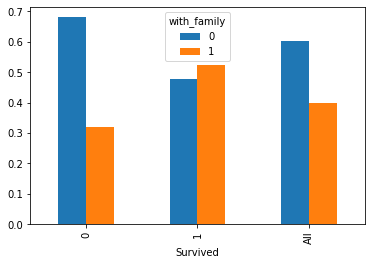

In [ ]:
survived_fam = pd.crosstab(index=data4["Survived"], 
                           columns=data4["with_family"], margins = True)
display(survived_fam/survived_fam.loc["All","All"])
display(survived_fam/survived_fam.loc["All"])
survived_fam = survived_fam.div(survived_fam["All"],
                   axis=0)
display(survived_fam)
survived_fam.pop('All')
survived_fam.plot(kind = 'bar')

### fare column

In [ ]:
data3['Fare'].isnull().sum()

0

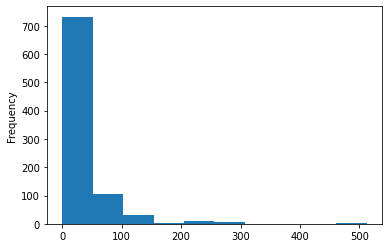

In [ ]:
data3['Fare'].plot(kind = 'hist')

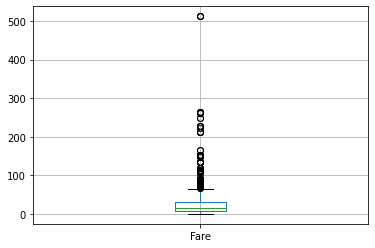

In [ ]:
data3.boxplot(column = ['Fare'])

In [ ]:
index = np.where(data4["Fare"] >100) 

data4.loc[index]

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,with_family
27,0,male,19.000000,3,2,263.0000,C23 C25 C27,S,1,0,0,1
31,1,female,29.699118,1,0,146.5208,B78,C,1,0,0,1
88,1,female,23.000000,3,2,263.0000,C23 C25 C27,S,1,0,0,1
118,0,male,24.000000,0,1,247.5208,B58 B60,C,1,0,0,1
195,1,female,58.000000,0,0,146.5208,B80,C,1,0,0,0
215,1,female,31.000000,1,0,113.2750,D36,C,1,0,0,1
258,1,female,35.000000,0,0,512.3292,NaN,C,1,0,0,0
268,1,female,58.000000,0,1,153.4625,C125,S,1,0,0,1
269,1,female,35.000000,0,0,135.6333,C99,S,1,0,0,0
297,0,female,2.000000,1,2,151.5500,C22 C26,S,1,0,0,1


we can see that extra money was payed for passenger class 1 .This outliers gives us this info so we donot the change the outlier

In [ ]:
data4.describe()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,with_family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.397306
std,0.486592,13.002015,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.489615
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000
75%,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [ ]:
bins = [0,20,40,60,80,100,520]
labels = ['0-20','20-40','40-60','60-80','80-100','100-520']

fare_range = pd.cut(data4['Fare'],bins = bins, labels = labels)


Fare,0-20,20-40,40-60,60-80,80-100,100-520,All
Survived,,,,,,,
0,0.408676,0.130137,0.026256,0.026256,0.003425,0.015982,0.610731
1,0.162100,0.098174,0.035388,0.028539,0.020548,0.044521,0.389269
All,0.570776,0.228311,0.061644,0.054795,0.023973,0.060502,1.000000


Fare,0-20,20-40,40-60,60-80,80-100,100-520,All
Survived,,,,,,,
0,0.716,0.57,0.425926,0.479167,0.142857,0.264151,0.610731
1,0.284,0.43,0.574074,0.520833,0.857143,0.735849,0.389269
All,1.000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000


Fare,0-20,20-40,40-60,60-80,80-100,100-520,All
Survived,,,,,,,
0,0.669159,0.213084,0.042991,0.042991,0.005607,0.026168,1.0
1,0.416422,0.252199,0.090909,0.073314,0.052786,0.114370,1.0
All,0.570776,0.228311,0.061644,0.054795,0.023973,0.060502,1.0


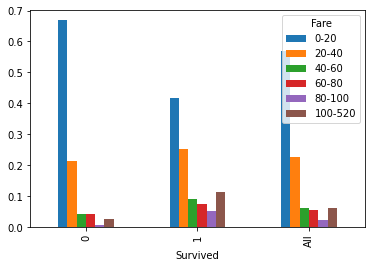

In [ ]:
survived_fare = pd.crosstab(index=data4["Survived"], 
                           columns=fare_range, margins = True)
display(survived_fare/survived_fare.loc["All","All"])
display(survived_fare/survived_fare.loc["All"])
survived_fare = survived_fare.div(survived_fare["All"],
                   axis=0)
display(survived_fare)
survived_fare.pop('All')
survived_fare.plot(kind = 'bar')

## categorical columns

In [ ]:
categorical_cols = data2.dtypes[data.dtypes == "object"].index
print(categorical_cols)


Index(['Sex', 'Cabin', 'Embarked'], dtype='object')


### Sex column

In [ ]:
data4['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
data4['Sex'].isnull().sum()

0

Sex,female,male,All
Survived,,,
0,0.090909,0.525253,0.616162
1,0.261504,0.122334,0.383838
All,0.352413,0.647587,1.000000


Sex,female,male,All
Survived,,,
0,0.257962,0.811092,0.616162
1,0.742038,0.188908,0.383838
All,1.000000,1.000000,1.000000


Sex,female,male,All
Survived,,,
0,0.147541,0.852459,1.0
1,0.681287,0.318713,1.0
All,0.352413,0.647587,1.0


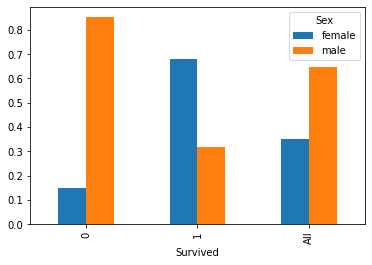

In [ ]:
surviver_sex = pd.crosstab(index=data4["Survived"], 
                           columns=data['Sex'], margins = True)
display(surviver_sex/surviver_sex.loc["All","All"])
display(surviver_sex/surviver_sex.loc["All"])
surviver_sex = surviver_sex.div(surviver_sex["All"],
                   axis=0)
display(surviver_sex)
surviver_sex.pop('All')
surviver_sex.plot(kind = 'bar')

In [ ]:
# Do the one hot encoding
data4 = pd.get_dummies(data4, columns=['Sex'])
data4.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,with_family,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,NaN,S,0,0,1,1,0,1
1,1,38.0,1,0,71.2833,C85,C,1,0,0,1,1,0
2,1,26.0,0,0,7.9250,NaN,S,0,0,1,0,1,0
3,1,35.0,1,0,53.1000,C123,S,1,0,0,1,1,0
4,0,35.0,0,0,8.0500,NaN,S,0,0,1,0,0,1


### Cabin

In [ ]:
data4['Cabin'].isnull().sum()

687

In [ ]:
data4['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

even though this has a lot of nan values we cant delete this columns because dependind on which deck got flooded first the survival will on that so we assign a new cabin called a No cabin to this column for nan
and also there seems to be repeating cabin letters which are unique so we can filter out the numbers

In [ ]:
cabin = data4["Cabin"].astype(str) 

Cabin = np.array([obs[0] for obs in cabin])
ct = pd.crosstab(index = Cabin, columns = 'count')
display(ct)
Cabin = pd.Categorical(Cabin)

data5 = data4.copy()
data5['Cabin'] = Cabin
data5 = pd.get_dummies(data5, columns=['Cabin'])
data5.head()

col_0,count
row_0,
A,15
B,47
C,59
D,33
E,32
F,13
G,4
T,1
n,687


,Survived,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,with_family,...,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n
0,0,22.0,1,0,7.2500,S,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,C,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,S,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,S,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,S,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


col_0,A,B,C,D,E,F,G,T,n,All
Survived,,,,,,,,,,
0,0.008979,0.013468,0.026936,0.008979,0.008979,0.005612,0.002245,0.001122,0.539843,0.616162
1,0.007856,0.039282,0.039282,0.028058,0.026936,0.008979,0.002245,0.000000,0.231201,0.383838
All,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044,1.000000


col_0,A,B,C,D,E,F,G,T,n,All
Survived,,,,,,,,,,
0,0.533333,0.255319,0.40678,0.242424,0.25,0.384615,0.5,1.0,0.700146,0.616162
1,0.466667,0.744681,0.59322,0.757576,0.75,0.615385,0.5,0.0,0.299854,0.383838
All,1.000000,1.000000,1.00000,1.000000,1.00,1.000000,1.0,1.0,1.000000,1.000000


col_0,A,B,C,D,E,F,G,T,n,All
Survived,,,,,,,,,,
0,0.014572,0.021858,0.043716,0.014572,0.014572,0.009107,0.003643,0.001821,0.876138,1.0
1,0.020468,0.102339,0.102339,0.073099,0.070175,0.023392,0.005848,0.000000,0.602339,1.0
All,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044,1.0


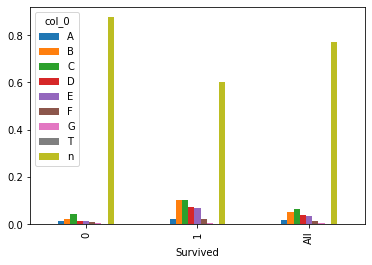

In [ ]:
surviver_cabin = pd.crosstab(index=data4["Survived"], 
                           columns=Cabin, margins = True)
display(surviver_cabin/surviver_cabin.loc["All","All"])
display(surviver_cabin/surviver_cabin.loc["All"])
surviver_cabin = surviver_cabin.div(surviver_cabin["All"],
                   axis=0)
display(surviver_cabin)
surviver_cabin.pop('All')
surviver_cabin.plot(kind = 'bar')

### embark column

In [ ]:
data5['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)


In [ ]:
data5['Embarked'].isnull().sum()

2

Embarked,C,Q,S,All
Survived,,,,
0,0.084364,0.052868,0.480315,0.617548
1,0.104612,0.033746,0.244094,0.382452
All,0.188976,0.086614,0.724409,1.000000


Embarked,C,Q,S,All
Survived,,,,
0,0.446429,0.61039,0.663043,0.617548
1,0.553571,0.38961,0.336957,0.382452
All,1.000000,1.00000,1.000000,1.000000


Embarked,C,Q,S,All
Survived,,,,
0,0.136612,0.085610,0.777778,1.0
1,0.273529,0.088235,0.638235,1.0
All,0.188976,0.086614,0.724409,1.0


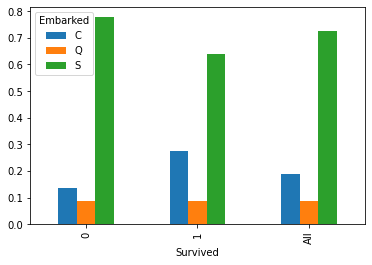

In [ ]:
surviver_embarked = pd.crosstab(index=data4["Survived"], 
                           columns=data['Embarked'], margins = True)
display(surviver_embarked/surviver_embarked.loc["All","All"])
display(surviver_embarked/surviver_embarked.loc["All"])
surviver_embarked = surviver_embarked.div(surviver_embarked["All"],
                   axis=0)
display(surviver_embarked)
surviver_embarked.pop('All')
surviver_embarked.plot(kind = 'bar')

In [ ]:
# Do the one hot encoding
data6 = data5.copy()
data6 = pd.get_dummies(data6, columns=['Embarked'])
data6.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,with_family,Sex_female,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


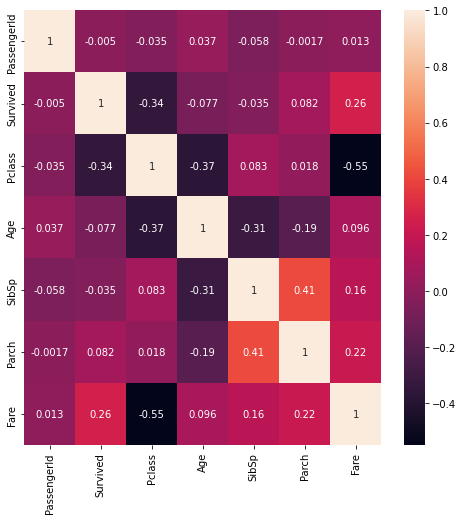

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
corr = data.corr()
sns.heatmap(corr, annot=True, ax = ax)


## Hypothesis testing

### H0: Data is normally distributed H1: Data is not normally distributed

In [ ]:
import scipy.stats as ss

In [ ]:
dummy = data[data['Age'].notna()].Age

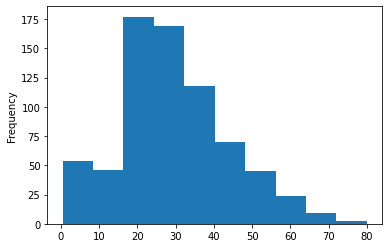

In [ ]:
dummy.plot(kind = 'hist')

In [ ]:
from scipy.stats import normaltest
stat, pvalue = normaltest(dummy)
print(stat, pvalue)
if pvalue<0.05:
  print("not a normal distribution")
else:
  print("Normal distribution")

18.105032952089758 0.00011709599657350757
not a normal distribution


We apply boxcox to make the data normally distributed

In [ ]:
from scipy.stats import boxcox

In [ ]:
normal_Age = boxcox(dummy)

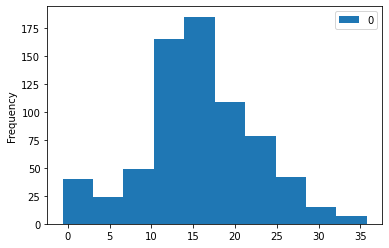

In [ ]:
pd.DataFrame(normal_Age[0]).plot(kind = 'hist')

In [ ]:
from scipy.stats import normaltest
stat, pvalue = normaltest(normal_Age[0])
print(stat, pvalue)
if pvalue<0.05:
  print("not a normal distribution")
else:
  print("Normal distribution")

1.2384147036970252 0.5383710072962454
Normal distribution


### H0: Sex doesnt matters for survival H1:Sex matters for survival

In [ ]:
surviver_sex = pd.crosstab(index=data4["Survived"], 
                           columns=data['Sex'])

In [ ]:
surviver_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


In [ ]:
from scipy.stats import chi2_contingency
stat, p,dof, expected = chi2_contingency(surviver_sex)
print(p)
if p <0.05:
  print('Sex matters in terms of survival')
else:
  print('Sex doesnt matter for survival')

1.1973570627755645e-58
Sex matters in terms of survival


### H0:there is no relationship between age and fare H1: there is a relationship between age and fare

In [ ]:
from scipy.stats import spearmanr
coef, p = spearmanr(data6[1:60]['Age'], data6[1:60]['Fare'])
print(p)
if p<0.05:
  print('there is a relationship between age and Fare')
else:
  print('there is no relationship between age and fare')

0.47931972164440195
there is no relationship between age and fare
